In [4]:
def SSWM(x,w, n,FF,M, beta, N,L=0, w0=0):
    W=Fitness(x,FF, w)
    Timer=0
    MutCount=0
    MyTimer=[]
    MyMutCount=[]
    MaxFit=Fitness(numpy.array([1]*n),FF,w)
    while W<MaxFit-w0:
        xn=Mutation(x,M)
        Wn=Fitness(xn,FF,w)
        Timer+=1
        DeltaF=Wn-W
        Pfix=(1-numpy.exp(-2*beta*DeltaF))/(1-numpy.exp(-2*N*beta*DeltaF))
        if Pfix>random.random():
            x=list(xn)
            W=Wn
            MutCount+=1
            MyTimer.append(Timer)
            MyMutCount.append(MutCount)
    MyTimer= numpy.array(MyTimer)
    MyMutCount= numpy.array(MyMutCount)
    return MyMutCount, MyTimer, Timer

    
def Mutation(x,M):
    xn=list(x)
    if M==1:
        a=random.randint(1,len(x))-1
        xn[a]=(xn[a]-1)%2
    if M==2: 
        print ('global mutations - not yet implemented')
    return xn

 
def Fitness(x,FF,w, L=0):
    if FF==1:
        W=sum(x)
        #print 'OneMax'
    if FF==2:
        W=0
        i=0
        if sum(x)==len(x):
            W=len(x)
            return W
        while (x[i]==1) & (W<len(x)):
                W+=1
                i+=1
    if FF==3:
        W=0
        i=0
        if sum(x)<L:
            W=sum(x)
        else:
            W=sum(x)-L+0.5
    if FF==4:
        WeightedX=numpy.multiply(w,x)
        W=sum(WeightedX)
    return W
    
def Init(n, FF, Wtotal):
    x=sum(numpy.random.randint(1, size=(1,n)))  #for init = all zeros
    w=sum(numpy.random.randint(1, size=(1,n)))+1  #all ones so far
     #x=sum(numpy.random.randint(2, size=(1,n)))  #for random init, cca 50:50
    if FF==4:
        m=float(4)
        #w=(sum(numpy.random.randint(m, size=(1,n)))+1)  #uniform random 1/m-1, m levels. 
        w= numpy.random.poisson(m, n)+1
        #Maxw=float(max(w))
        #w=w/Maxw
        #w= numpy.random.beta(2, 5, n)
        SumW=sum(w)
        w=float(Wtotal)/SumW*w
        
    return x, w

  
   
def Runtime(n,m,FF, M, L=0,  beta =0.1, N=1000, w0=0):
    T=[]
    Mut=0
    Wtotal = n
    (x,w)=Init(n, FF, Wtotal)

    for i in range(m):
        (Mc,Tc, t)=SSWM(x,w,n,FF,M, beta, N,L, w0)
        #Mut=Mut+Mc # toto musi byt fuc pre lin functions, lebo niekedy sa stane viac mutacii ako je dlzka n..
        T.append(t)
    #MyT=float(T)/m
    MyT=numpy.mean(T)
    MyTStd=numpy.std(T)
    #MyM=(Mut)/m
    #print ('Average runtime',MyT, 'iterations. Average number of mutations ', MyM) 
    #print ('expected runtime', MyT)
    return MyT, MyTStd

def Main():

    m=200 #repetitions
    t=100
    beta =0.1
    N=1000  #popuation size
    MyRT=[]
    MyRTSTD=[]
    Myn=[]
    w0=0.05
    FF=4  #which fitness landscape we are using: 1-onemax, 2 leading ones
    M=1    #which type of mutation we are using 1-local, 2 - global
    L=3

    for n in range (10,100,10):
        print ('running for n=', n)
        (RT, RTSTD)=Runtime(n, m, FF, M, L, beta, N)
        MyRT.append(RT)
        MyRTSTD.append(RTSTD)
        Myn.append(n)
     
    MyRT= numpy.array(MyRT)
    MyRTSTD= numpy.array(MyRTSTD)
    Myn= numpy.array(Myn)
    
    print ('MyRT', MyRT)
    print ('MyRTSTD', MyRTSTD)
    print ('Myn', Myn)
    
    ouf = open("LinearFunctions.txt", "w")
    ouf.write("MyRT\n")
    ouf.write(str( MyRT))
    ouf.write('\n')
    ouf.write('MyRTSTD\n')
    ouf.write(str( MyRTSTD))
    ouf.write('\n')
    ouf.write('Myn\n')
    ouf.write(str( Myn))
    ouf.write('\n')
    ouf.close()

    plt.plot(Myn,MyRT,'b')
    plt.plot(Myn,MyRT+MyRTSTD, 'g')
    plt.plot(Myn,MyRT-MyRTSTD, 'g')
    
    plt.show()
    
    
    print ('ended')






running for n= 10
running for n= 20
running for n= 30
running for n= 40
running for n= 50
running for n= 60
running for n= 70
running for n= 80
running for n= 90
MyRT [ 189.035  466.15   844.94  1252.585 1978.36  2570.795 3498.57  3638.625
 5669.385]
MyRTSTD [  84.59884027  183.10755719  303.11027102  530.10692579 1080.28566148
 1188.06608948 1661.16435523 1682.36828143 2566.40769886]
Myn [10 20 30 40 50 60 70 80 90]


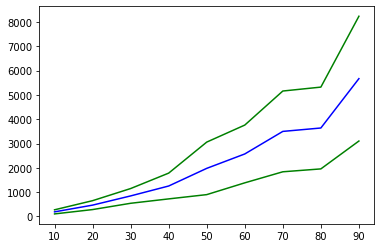

ended


In [5]:
import random   
import numpy
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

Main()